## Importing Libraries

In [552]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [553]:
def get_data():
    return pd.read_csv(r'C:\Playground\Catastrophe Risk Estimation Using Quantile Modeling\data\raw\PublicAssistanceGrantAwardActivities.csv')

In [554]:
df = get_data()

In [555]:
# Preview of data
df.head(3)

,region,disasterNumber,sriaDisaster,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,pnpStatus,damageCategoryCode,federalShareObligated,dateObligated,pwNumber,projectTitle,versionNumber,eligibilityStatus,fundingStatus,paCloseoutStatus,id
0,9,1397,0,EARTHQUAKE,DR,Earthquake,2001-12-05T00:00:00.000Z,GU,Guam,Statewide,000-U6K9Y-00,GUAM WATERWORKS AUTHORITY,0.0,F - Public Utilities,121.50,2002-02-01T00:00:00.000Z,37,PUMP STATION REPAIR - HAIRLINE CRACKS,0.0,E,O,C,756305cd-2657-42ed-bb35-8c8013c551a8
1,4,1381,0,TROPICAL STORM ALLISON,DR,Severe Storm,2001-06-17T00:00:00.000Z,FL,Florida,Washington,133-99133-00,WASHINGTON COUNTY,0.0,C - Roads and Bridges,3116.84,2001-10-03T00:00:00.000Z,210,ROADS AND BRIDGES,0.0,E,O,C,553d4c29-85ef-4002-ad7f-0b10c0b3da19
2,6,1709,0,"SEVERE STORMS, TORNADOES, AND FLOODING",DR,Severe Storm,2007-06-29T00:00:00.000Z,TX,Texas,Henderson,213-99213-00,HENDERSON (COUNTY),0.0,C - Roads and Bridges,7211.69,2007-11-09T00:00:00.000Z,2594,ROADS AND BRIDGES,0.0,E,O,C,743771d1-7292-4009-afc7-a8258ebc4414


In [556]:
# shape of data
df.shape

(948686, 23)

In [557]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948686 entries, 0 to 948685
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 948686 non-null  int64  
 1   disasterNumber         948686 non-null  int64  
 2   sriaDisaster           948686 non-null  int64  
 3   declarationTitle       948686 non-null  object 
 4   disasterType           948686 non-null  object 
 5   incidentType           948686 non-null  object 
 6   declarationDate        948686 non-null  object 
 7   stateAbbreviation      948686 non-null  object 
 8   state                  948686 non-null  object 
 9   county                 933386 non-null  object 
 10  applicantId            948686 non-null  object 
 11  applicantName          948686 non-null  object 
 12  pnpStatus              933406 non-null  float64
 13  damageCategoryCode     948686 non-null  object 
 14  federalShareObligated  948599 non-nu

In [558]:
df.describe()

,region,disasterNumber,sriaDisaster,pnpStatus,federalShareObligated,pwNumber,versionNumber
count,948686.000000,948686.000000,948686.000000,933406.000000,9.485990e+05,948686.000000,933406.000000
mean,4.878179,2105.549895,0.065504,0.072069,7.763919e+04,2412.666197,0.517784
std,2.199739,964.427874,0.247414,0.258603,4.080758e+06,3663.288906,1.163872
min,1.000000,1239.000000,0.000000,0.000000,-7.200000e+08,1.000000,0.000000
25%,3.000000,1561.000000,0.000000,0.000000,9.545950e+02,254.000000,0.000000
50%,5.000000,1699.000000,0.000000,0.000000,4.565840e+03,853.000000,0.000000
75%,6.000000,1952.000000,0.000000,0.000000,1.914367e+04,2865.000000,1.000000
max,10.000000,5538.000000,1.000000,1.000000,1.399420e+09,83562.000000,75.000000


In [559]:
# Summary of categorical features
df.describe(include='O')

,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,damageCategoryCode,dateObligated,projectTitle,eligibilityStatus,fundingStatus,paCloseoutStatus,id
count,948686,948686,948686,948686,948686,948686,933386,948686,948686,948686,948686,941191,948686,948686,948686,948686
unique,1265,3,27,1680,57,59,2753,60277,66627,17,7680,397190,5,2,2,948686
top,SEVERE STORMS AND FLOODING,DR,Severe Storm,2005-08-29T00:00:00.000Z,FL,Florida,Statewide,000-UXL4N-00,"FACILITY PLANNING AND CONTROL, STATE OF LOUISIANA",C - Roads and Bridges,2007-06-17T00:00:00.000Z,ROADS AND BRIDGES,E,O,C,756305cd-2657-42ed-bb35-8c8013c551a8
freq,118150,909414,383994,96374,99952,99952,174741,9940,8684,270898,6806,63693,946791,946778,724251,1


### Detailed Analysis of Missing Instances

In [560]:
# Checking for null values
df.isna().sum().to_frame(name='Null values').sort_values(by='Null values' ,ascending=False)

,Null values
county,15300
pnpStatus,15280
versionNumber,15280
projectTitle,7495
federalShareObligated,87
disasterNumber,0
region,0
declarationDate,0
incidentType,0
disasterType,0


📌 Null Value Distribution Across Metadata Fields

On analysis of missing values in the metadata columns reveals varying levels of null entries across different fields:

1. The county column contains 15,300 null values.

2. Both pnpStatus and versionNumber have 15,280 null values each.

3. The projectTitle column includes 7,495 null entries.

4. The federalShareObligated field has 87 null values, representing the lowest level of missingness among the listed columns.

The distribution shows that missing values are concentrated in specific metadata attributes, with administrative and categorical fields exhibiting substantially higher null counts compared to numerical fields. This pattern suggests inconsistency in metadata completeness across records.

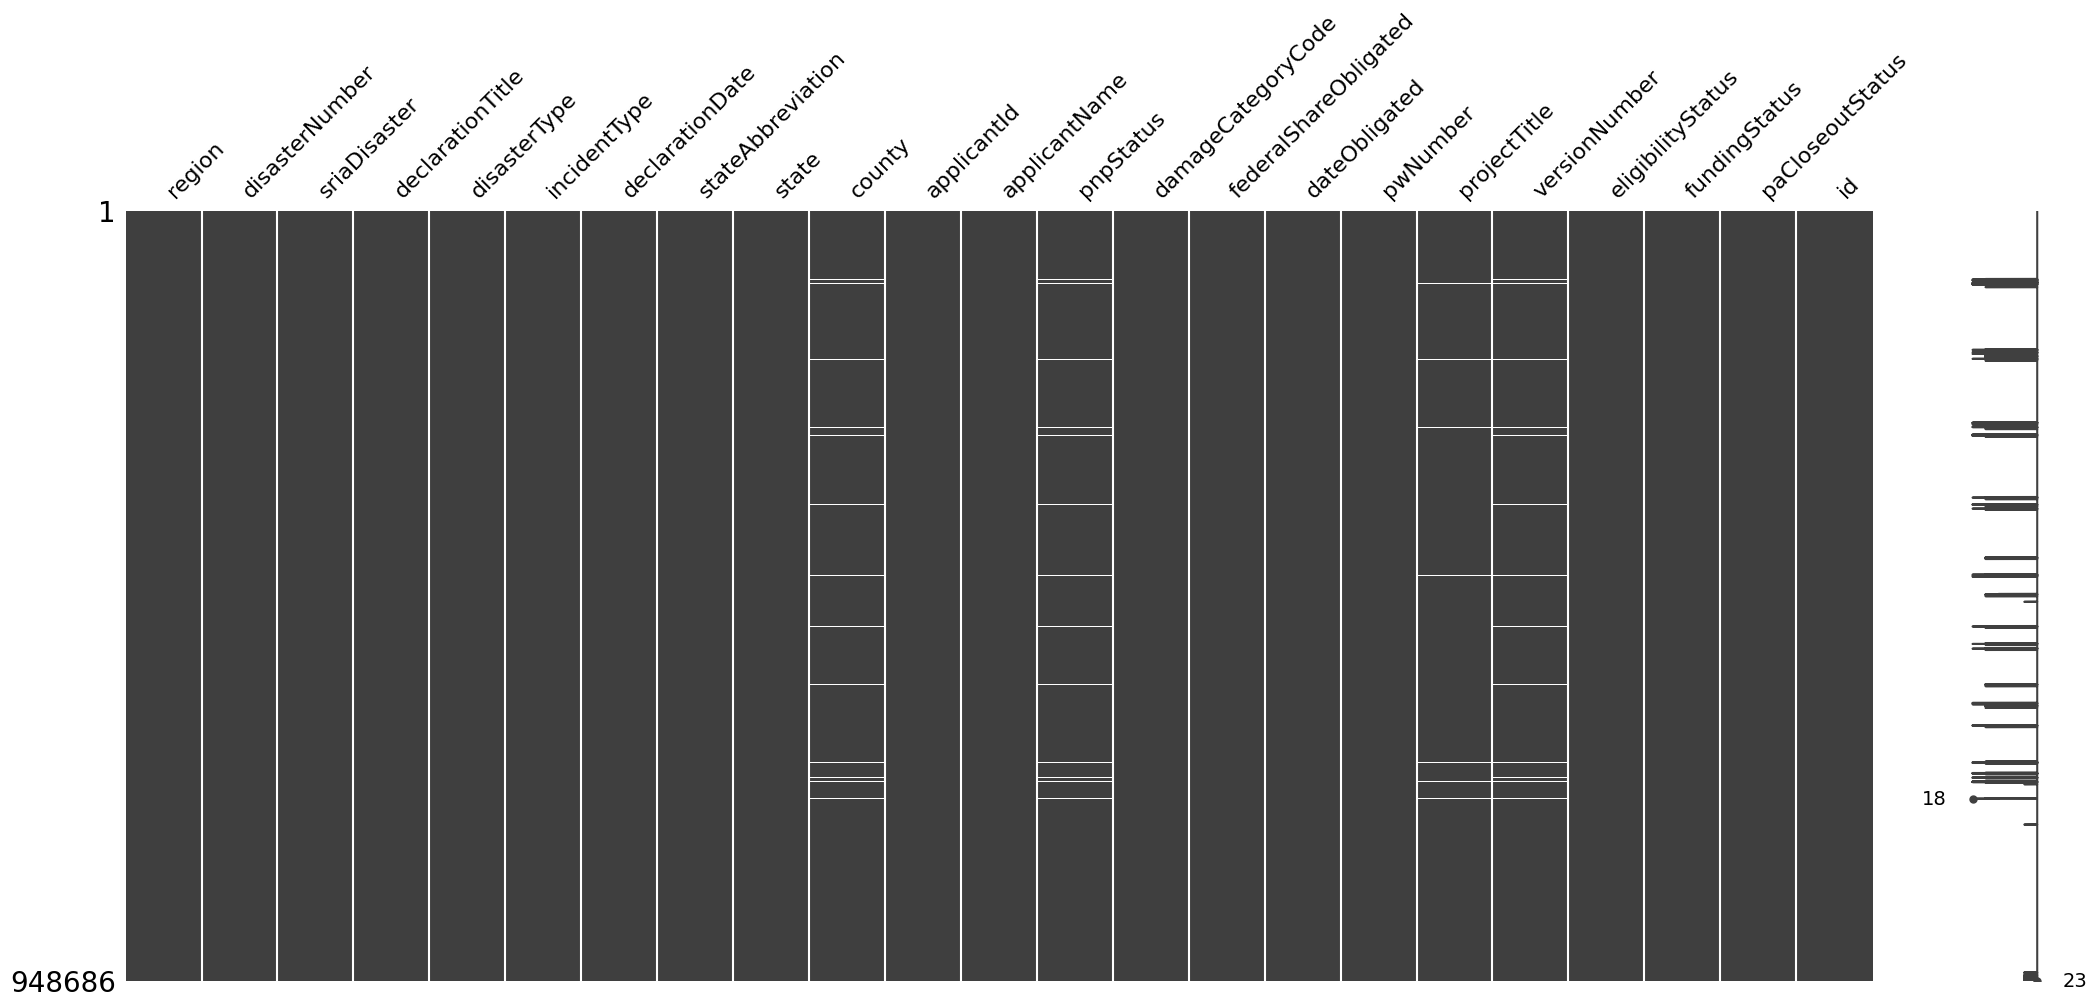

In [561]:
msno.matrix(
    df=df,
    label_rotation=45,
    sparkline=True
)
plt.show()

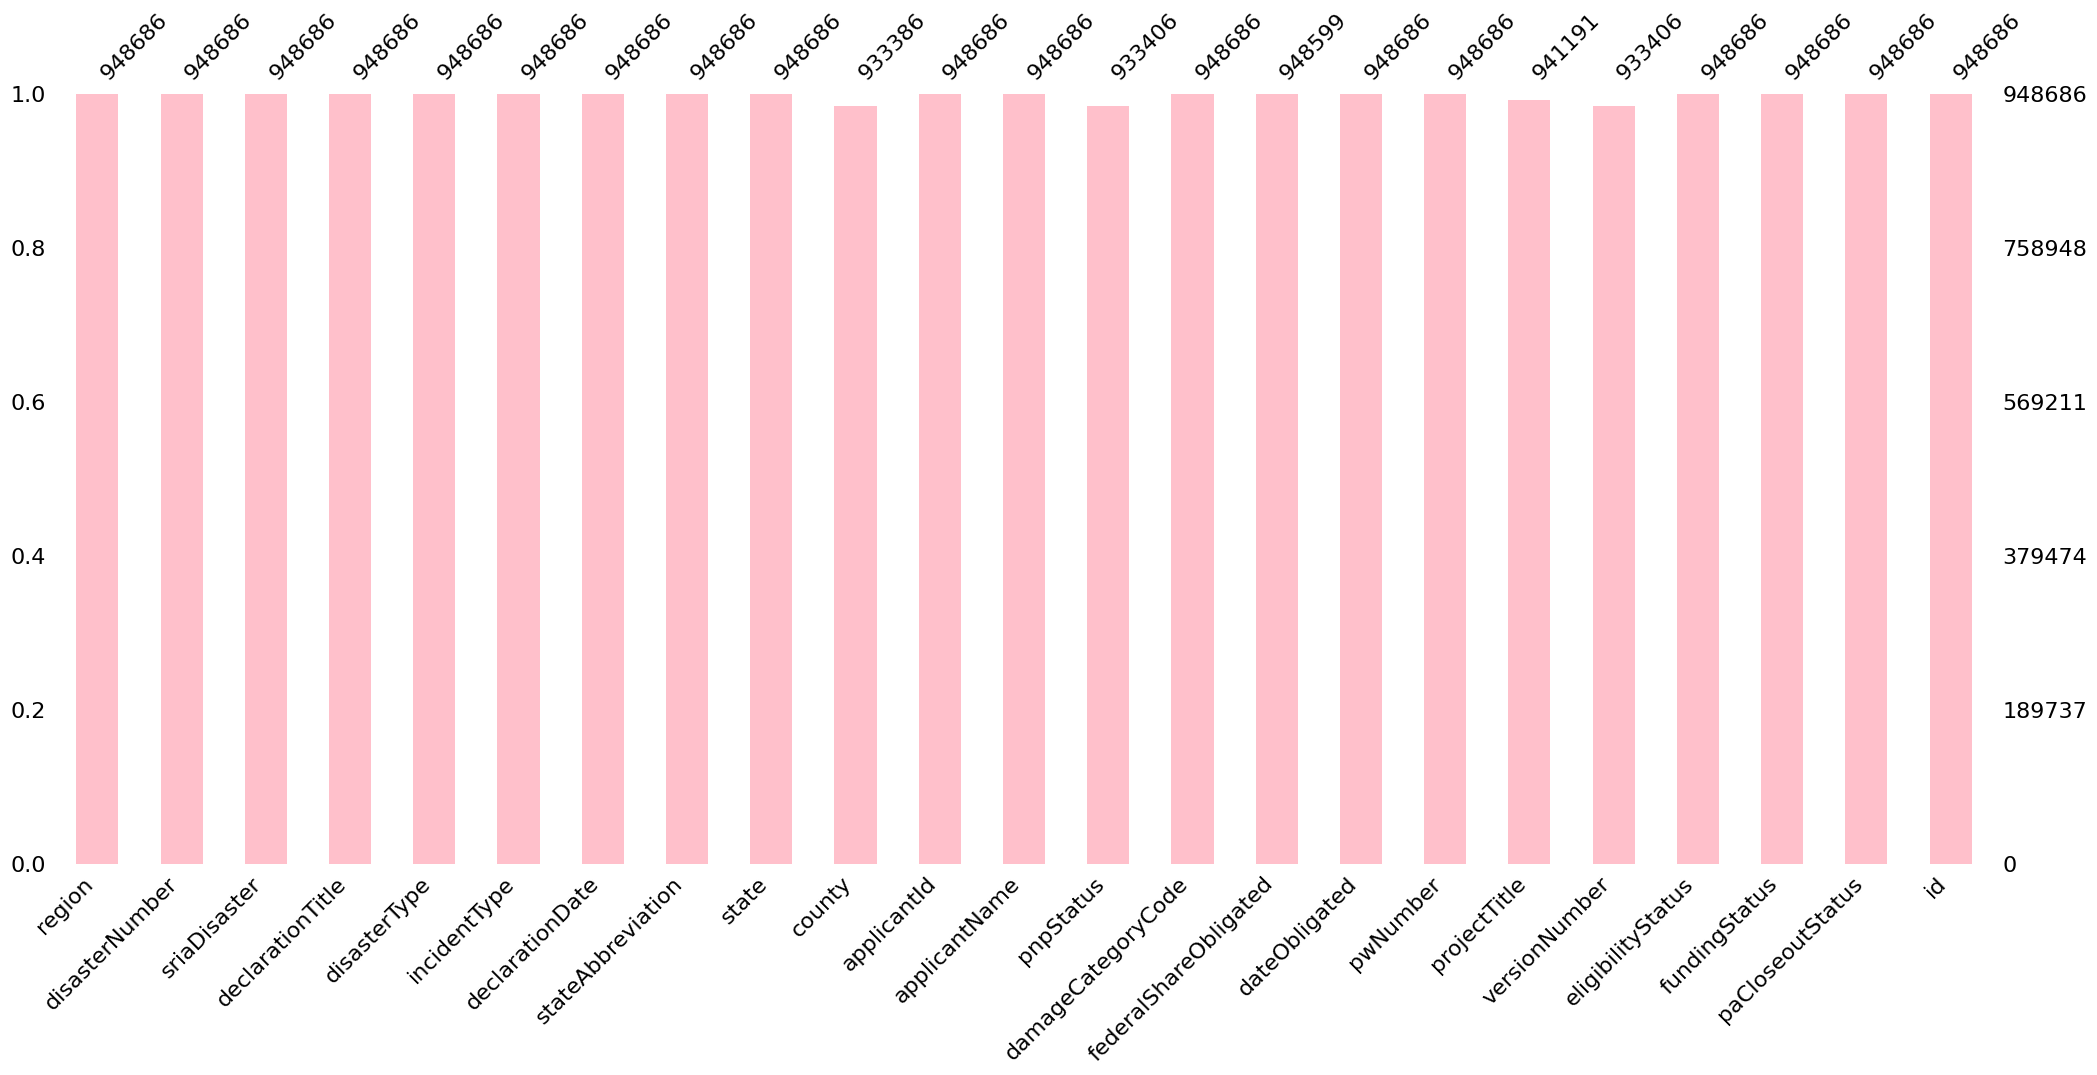

In [562]:
msno.bar(
    df=df,
    color='pink',
    label_rotation=45
)
plt.show()

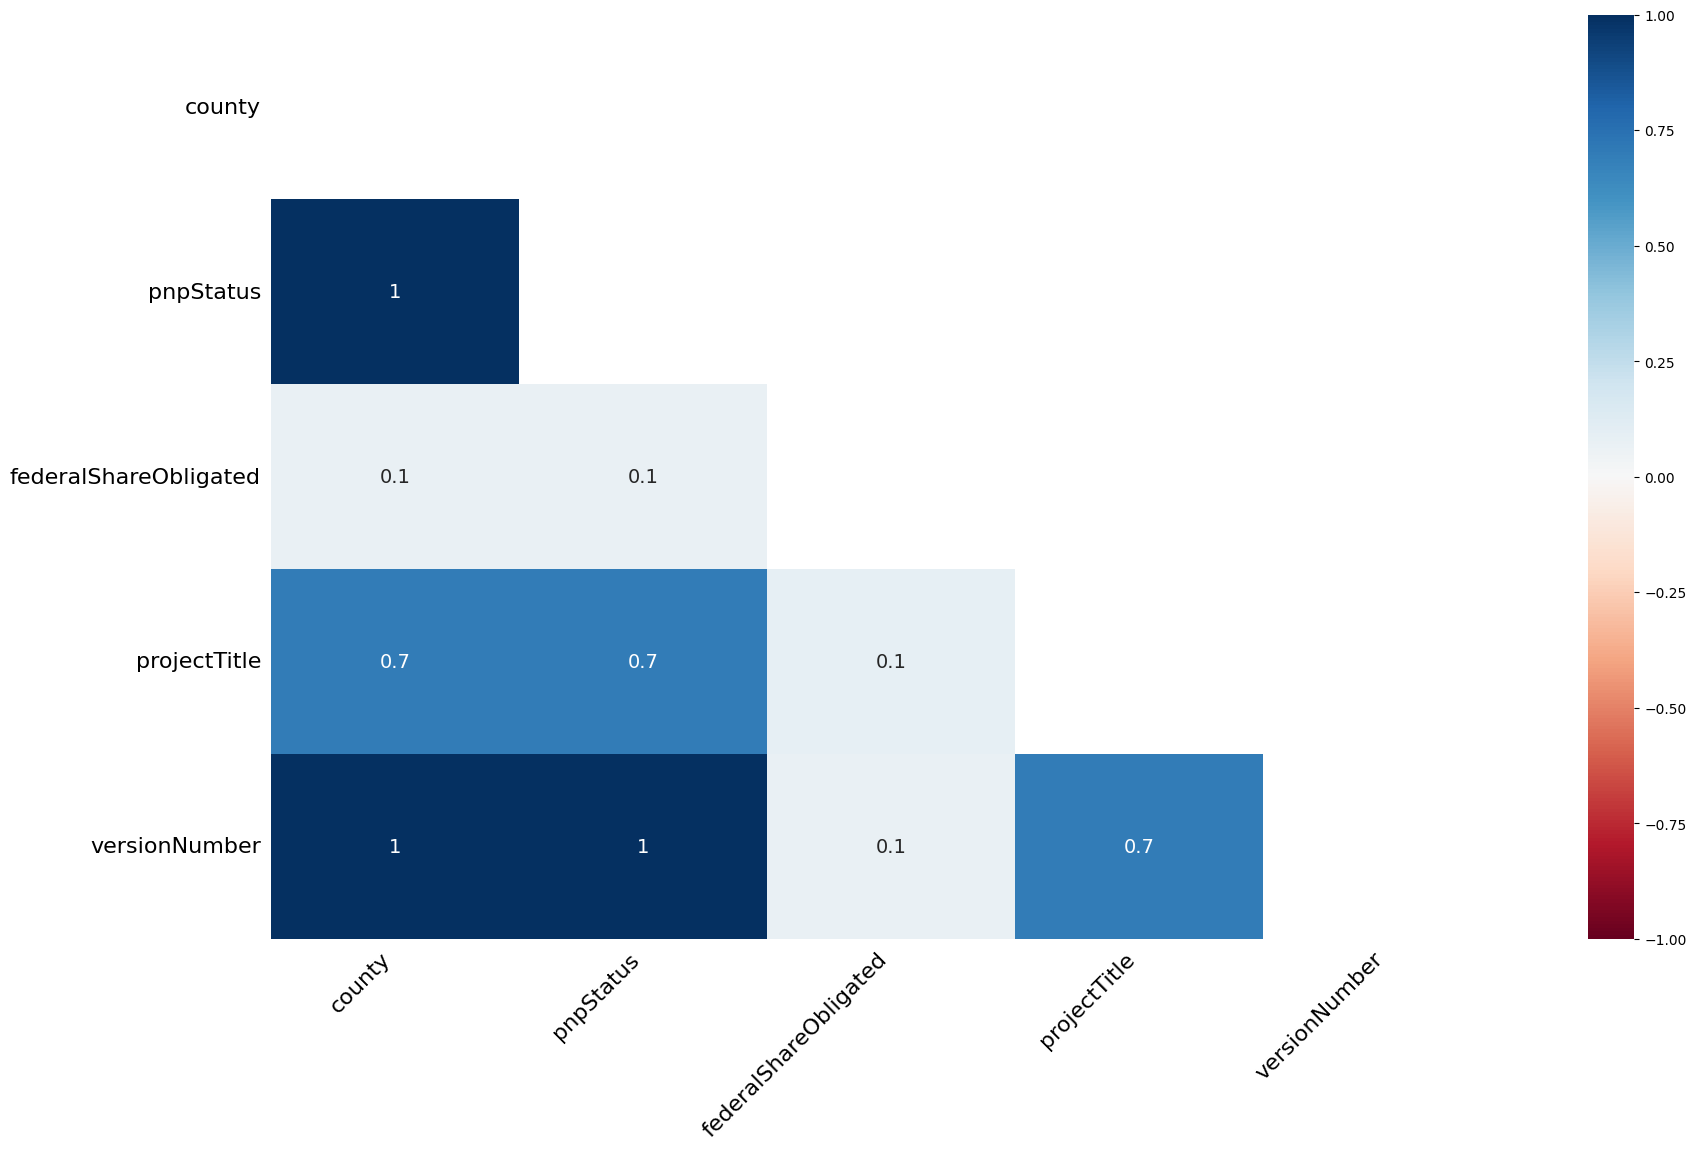

In [563]:
msno.heatmap(
    df=df,
    label_rotation=45,
    cbar=True
)
plt.show()

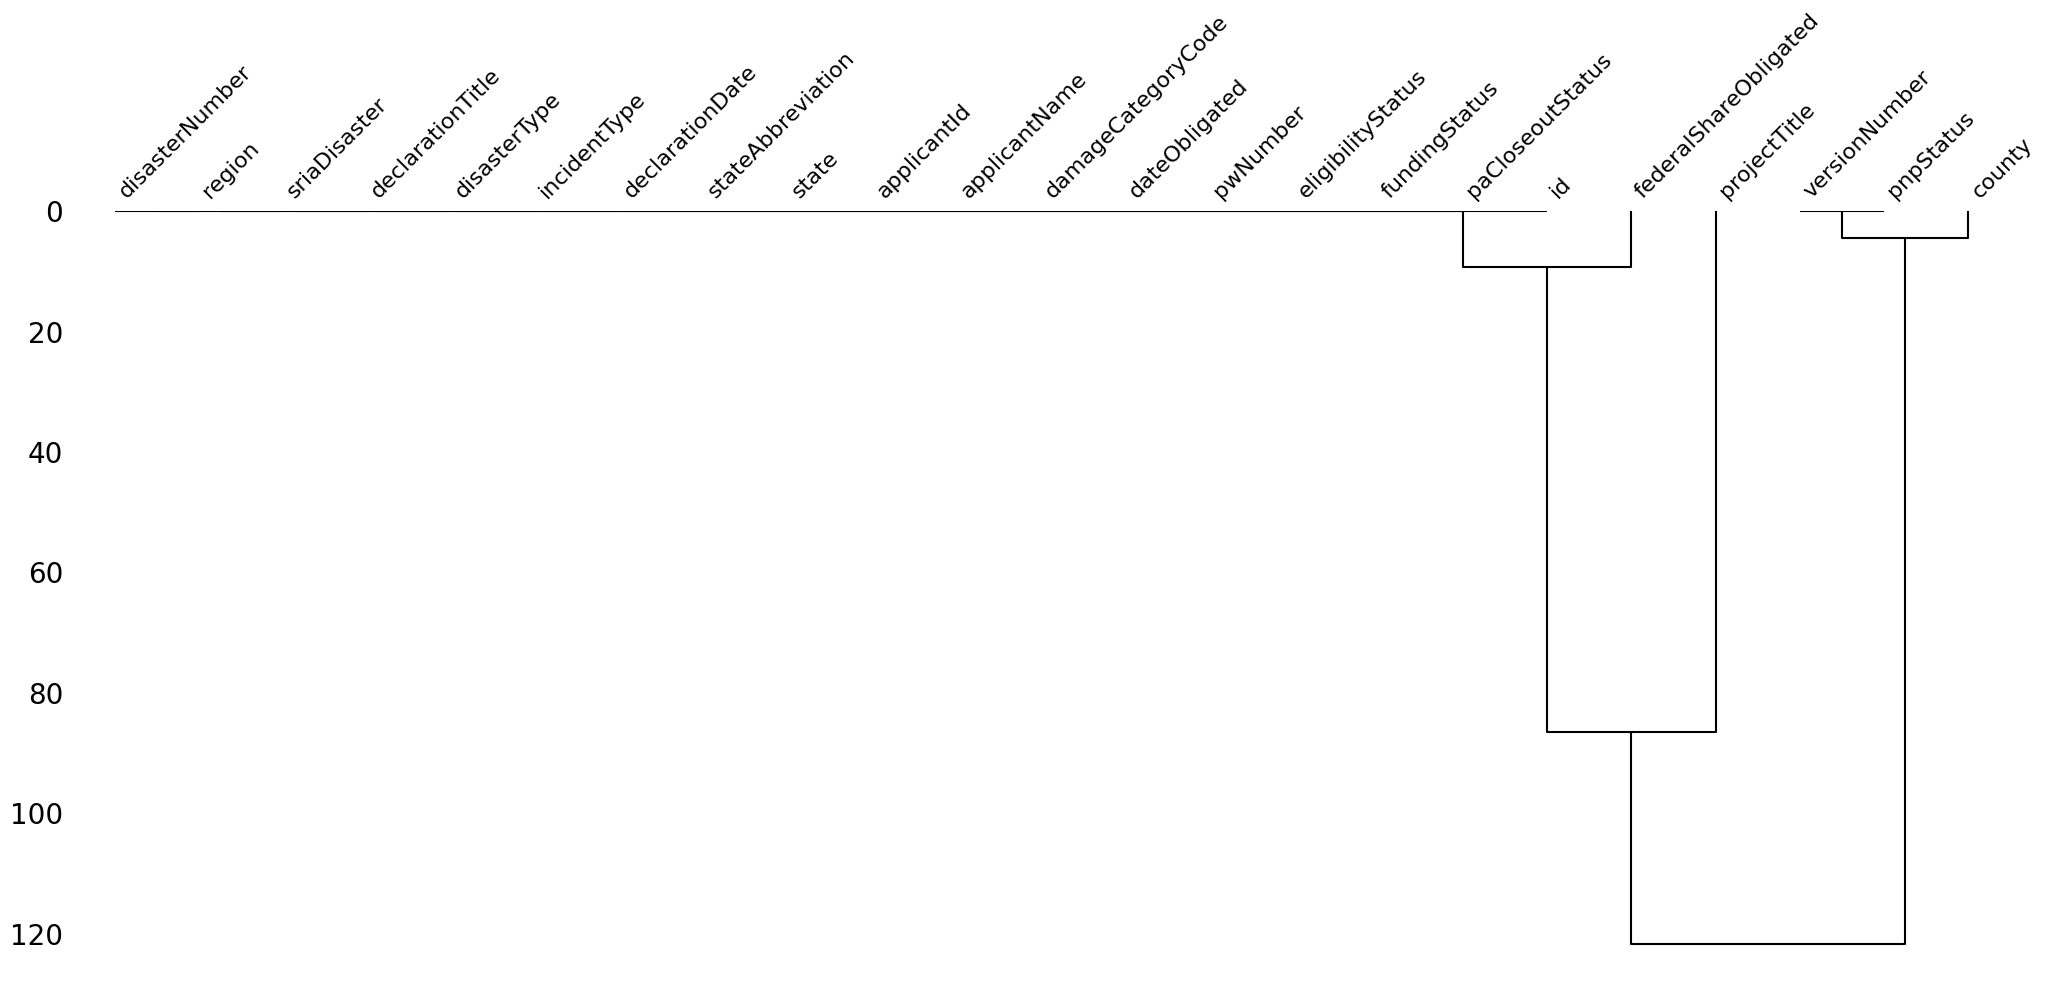

In [564]:
msno.dendrogram(
    df=df
)
plt.show()

📌 Correlation Structure in Missingness Patterns

The missingness heatmap reveals that null values across several metadata fields are strongly correlated rather than randomly distributed. Notably, the county, pnpStatus, and versionNumber columns exhibit near-perfect correlation in their missingness patterns, indicating that these fields tend to be missing simultaneously within the same records.

Additionally, the projectTitle column shows a moderate to strong correlation with these fields, suggesting partial overlap in missing entries. This implies that when administrative metadata such as county or status information is absent, descriptive fields like project titles are also frequently missing.

In contrast, the federalShareObligated column demonstrates very weak correlation with the other variables, indicating that its missing values occur more independently and are not strongly tied to the absence of other metadata fields.

Overall, the heatmap clearly indicates that missingness in this dataset follows a structured and clustered pattern, where groups of related columns tend to be missing together. This suggests that the null values are likely associated with systematic data collection or reporting gaps, rather than random omissions at the individual field level.

Correlation Structure and Type of Missingness

Based on this structured dependency—where the missingness of a variable is strongly associated with the observed values or missingness of other variables—the missing data mechanism aligns with Missing At Random (MAR). The observed correlations suggest that the probability of a value being missing depends on other recorded attributes, rather than on the unobserved value itself.

Overall, the heatmap demonstrates that missingness in this dataset is systematic and explainable, forming clear patterns across groups of related columns rather than occurring in a purely random manner.

In [565]:
# Checking for duplicate values
df.duplicated(keep=False).sum()

np.int64(0)

There are no duplicate instances in the dataset

In [566]:
df.head(5)

,region,disasterNumber,sriaDisaster,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,pnpStatus,damageCategoryCode,federalShareObligated,dateObligated,pwNumber,projectTitle,versionNumber,eligibilityStatus,fundingStatus,paCloseoutStatus,id
0,9,1397,0,EARTHQUAKE,DR,Earthquake,2001-12-05T00:00:00.000Z,GU,Guam,Statewide,000-U6K9Y-00,GUAM WATERWORKS AUTHORITY,0.0,F - Public Utilities,121.50,2002-02-01T00:00:00.000Z,37,PUMP STATION REPAIR - HAIRLINE CRACKS,0.0,E,O,C,756305cd-2657-42ed-bb35-8c8013c551a8
1,4,1381,0,TROPICAL STORM ALLISON,DR,Severe Storm,2001-06-17T00:00:00.000Z,FL,Florida,Washington,133-99133-00,WASHINGTON COUNTY,0.0,C - Roads and Bridges,3116.84,2001-10-03T00:00:00.000Z,210,ROADS AND BRIDGES,0.0,E,O,C,553d4c29-85ef-4002-ad7f-0b10c0b3da19
2,6,1709,0,"SEVERE STORMS, TORNADOES, AND FLOODING",DR,Severe Storm,2007-06-29T00:00:00.000Z,TX,Texas,Henderson,213-99213-00,HENDERSON (COUNTY),0.0,C - Roads and Bridges,7211.69,2007-11-09T00:00:00.000Z,2594,ROADS AND BRIDGES,0.0,E,O,C,743771d1-7292-4009-afc7-a8258ebc4414
3,4,1549,0,HURRICANE IVAN,DR,Hurricane,2004-09-15T00:00:00.000Z,AL,Alabama,Baldwin,003-57144-00,ORANGE BEACH,0.0,A - Debris Removal,129387.21,2005-01-29T00:00:00.000Z,1509,DEBRIS REMOVAL,0.0,E,O,C,4c86e4b3-3e25-4b89-904a-26048d4181c1
4,5,1370,0,"SEVERE WINTER STORMS, FLOODING, AND TORNADOES",DR,Flood,2001-05-16T00:00:00.000Z,MN,Minnesota,Houston,055-33866-00,LA CRESCENT,0.0,A - Debris Removal,11512.50,2001-09-22T00:00:00.000Z,1418,DEBRIS REMOVAL,0.0,E,O,C,158efd8c-5c67-418b-8951-6e3ca9be537e


In [567]:
num_cols = df.select_dtypes(include=[int, float]).columns.to_list()
cat_cols = df.select_dtypes(include='O').columns.to_list()

print(f"There are {len(num_cols)} Numerical columns: {num_cols}")
print(f"There are {len(cat_cols)} Categorical columns: {cat_cols}")


There are 7 Numerical columns: ['region', 'disasterNumber', 'sriaDisaster', 'pnpStatus', 'federalShareObligated', 'pwNumber', 'versionNumber']
There are 16 Categorical columns: ['declarationTitle', 'disasterType', 'incidentType', 'declarationDate', 'stateAbbreviation', 'state', 'county', 'applicantId', 'applicantName', 'damageCategoryCode', 'dateObligated', 'projectTitle', 'eligibilityStatus', 'fundingStatus', 'paCloseoutStatus', 'id']


### Detailed Cleaning of Categorical Features
---

In [568]:
df[cat_cols].head(5)

,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,damageCategoryCode,dateObligated,projectTitle,eligibilityStatus,fundingStatus,paCloseoutStatus,id
0,EARTHQUAKE,DR,Earthquake,2001-12-05T00:00:00.000Z,GU,Guam,Statewide,000-U6K9Y-00,GUAM WATERWORKS AUTHORITY,F - Public Utilities,2002-02-01T00:00:00.000Z,PUMP STATION REPAIR - HAIRLINE CRACKS,E,O,C,756305cd-2657-42ed-bb35-8c8013c551a8
1,TROPICAL STORM ALLISON,DR,Severe Storm,2001-06-17T00:00:00.000Z,FL,Florida,Washington,133-99133-00,WASHINGTON COUNTY,C - Roads and Bridges,2001-10-03T00:00:00.000Z,ROADS AND BRIDGES,E,O,C,553d4c29-85ef-4002-ad7f-0b10c0b3da19
2,"SEVERE STORMS, TORNADOES, AND FLOODING",DR,Severe Storm,2007-06-29T00:00:00.000Z,TX,Texas,Henderson,213-99213-00,HENDERSON (COUNTY),C - Roads and Bridges,2007-11-09T00:00:00.000Z,ROADS AND BRIDGES,E,O,C,743771d1-7292-4009-afc7-a8258ebc4414
3,HURRICANE IVAN,DR,Hurricane,2004-09-15T00:00:00.000Z,AL,Alabama,Baldwin,003-57144-00,ORANGE BEACH,A - Debris Removal,2005-01-29T00:00:00.000Z,DEBRIS REMOVAL,E,O,C,4c86e4b3-3e25-4b89-904a-26048d4181c1
4,"SEVERE WINTER STORMS, FLOODING, AND TORNADOES",DR,Flood,2001-05-16T00:00:00.000Z,MN,Minnesota,Houston,055-33866-00,LA CRESCENT,A - Debris Removal,2001-09-22T00:00:00.000Z,DEBRIS REMOVAL,E,O,C,158efd8c-5c67-418b-8951-6e3ca9be537e


**1. dateObligated**

Date Obligated (FEMA Public Assistance)

The dateObligated variable represents the date on which FEMA formally obligated federal funds for a Public Assistance (PA) project. In FEMA’s funding process, obligation is the official commitment of federal funds after a project has been reviewed, approved, and deemed eligible. Once funds are obligated, the associated federalShareObligated amount becomes an actual financial commitment, rather than an estimate or pending request.

In [569]:
df.dateObligated.sample(10)

759578    2007-10-12T00:00:00.000Z
168335    2008-03-20T00:00:00.000Z
676551    2005-07-18T00:00:00.000Z
725964    2007-06-17T00:00:00.000Z
862423    2007-09-11T00:00:00.000Z
794379    2018-07-02T00:00:00.000Z
297374    2007-04-05T00:00:00.000Z
359766    2005-10-21T00:00:00.000Z
113761    2012-01-03T00:00:00.000Z
789938    2018-11-08T00:00:00.000Z
Name: dateObligated, dtype: object

**2. declarationDate**

Declaration Date (FEMA Disaster Declarations)

The declarationDate variable represents the date on which FEMA officially declared a disaster or emergency for a given event. This declaration is issued by the U.S. President (or FEMA under delegated authority) after a state requests federal assistance and determines that the severity of the event exceeds state and local response capabilities. The declaration date marks the formal start of federal involvement in the disaster response and recovery process.

In [570]:
df.declarationDate.sample(10)

115631    1999-01-08T00:00:00.000Z
687462    2005-08-29T00:00:00.000Z
428678    2008-05-27T00:00:00.000Z
118739    2008-03-19T00:00:00.000Z
749844    2005-08-29T00:00:00.000Z
426157    2013-07-25T00:00:00.000Z
848770    2005-08-29T00:00:00.000Z
722678    2006-03-20T00:00:00.000Z
791701    2005-09-24T00:00:00.000Z
383289    2011-08-31T00:00:00.000Z
Name: declarationDate, dtype: object

**3. damageCategoryCode**

In [571]:
df.damageCategoryCode.unique()

array(['F - Public Utilities', 'C - Roads and Bridges',
       'A - Debris Removal', 'E - Public Buildings',
       'B - Protective Measures', 'G - Recreational or Other',
       'D - Water Control Facilities', 'Z - State Management',
       'H - Fire Management', 'B - Emergency Protective Measures',
       'E - Buildings and Equipment', 'F - Utilities',
       'Z - Direct Administrative Costs',
       'B - Emergency Work Donated Resources',
       'G - Parks, Recreational Facilities, and Other Items',
       'Z - Management Costs', 'Z - Section 324 Management Costs'],
      dtype=object)

Damage Category Code (FEMA Public Assistance)

The damageCategoryCode feature represents FEMA’s official Public Assistance (PA) damage categories, which classify the type of disaster-related work or infrastructure for which federal funding was obligated. These categories are standardized across FEMA programs and play a critical role in organizing disaster response, allocating recovery funds, and assessing the nature and severity of public infrastructure damage following catastrophic events.

Each category corresponds to a specific class of disaster recovery activity, ranging from immediate emergency response to long-term infrastructure restoration and administrative management. Importantly, these categories are not merely descriptive labels—they capture structural differences in cost behavior, making them highly relevant for modeling financial risk and tail outcomes.

Below is a detailed description of each category observed in the dataset:

A – Debris Removal
This category includes costs associated with clearing disaster-generated debris such as fallen trees, rubble, and wreckage. Debris removal is often one of the earliest recovery activities and can involve significant labor, equipment, and disposal costs. While individual projects are often moderate in size, large-scale disasters (e.g., hurricanes) can lead to substantial cumulative expenditures.

B – Emergency Protective Measures
This category covers actions taken to eliminate or reduce immediate threats to public health and safety. Examples include evacuations, temporary shelters, emergency medical services, law enforcement support, and protective measures taken during or immediately after a disaster. Variants in the data (such as donated resources or emergency work) reflect different funding mechanisms. These costs are time-critical and can escalate quickly during severe events.

C – Roads and Bridges
This category involves the repair or replacement of damaged roads, bridges, and related transportation infrastructure. Because transportation networks are essential for emergency response and economic recovery, projects in this category can become very expensive, particularly when major highways or bridges are affected. Costs in this category often contribute significantly to large FEMA payouts.

D – Water Control Facilities
This category includes damage to levees, dams, flood control channels, drainage systems, and similar infrastructure. Although projects in this category are less frequent, they are often associated with extreme costs when failures occur. From a catastrophe-risk perspective, this category is especially important because it frequently drives upper-tail financial losses.

E – Buildings and Equipment
This category covers repairs or replacement of publicly owned buildings and equipment, such as schools, hospitals, government offices, and emergency facilities. Costs vary widely depending on the type and importance of the facility, and damage to critical buildings can result in large recovery expenditures.

F – Utilities
This category includes damage to public utility systems such as electricity, water supply, wastewater, and communications infrastructure. Utility failures often affect large populations and require rapid, large-scale restoration efforts, making this category a major contributor to high-cost recovery projects.

G – Parks, Recreational Facilities, and Other Items
This category encompasses parks, beaches, recreational facilities, and other non-critical public assets. While important for community recovery and quality of life, projects in this category generally involve smaller funding amounts and are less likely to drive extreme tail losses.

H – Fire Management
This category is primarily associated with wildfire events and includes firefighting activities, fire suppression infrastructure, and related management costs. In extreme wildfire scenarios, projects in this category can become highly expensive and are increasingly relevant in the context of climate-driven disaster risk.

Z – Management and Administrative Costs
This category includes state and local management costs related to administering Public Assistance grants, such as planning, coordination, compliance, and oversight. These costs do not correspond to physical damage and are typically more predictable and lower in magnitude compared to infrastructure repair categories.

From a catastrophe risk estimation standpoint, the damage category code is a crucial feature because it differentiates between routine recovery activities and high-severity infrastructure failures. Categories such as Water Control Facilities (D), Utilities (F), Roads and Bridges (C), and Fire Management (H) are more likely to generate rare but extremely high recovery costs, which dominate the upper quantiles of FEMA expenditures. In contrast, management and recreational categories tend to exhibit lower variability and smaller financial impact. This makes the damage category code particularly valuable for quantile-based modeling, where the goal is to estimate tail risk rather than average recovery costs.

In [572]:

def clean_damage_category(cat):
    if pd.isna(cat):
        return "Unknown"
    
    # Extract first letter (A, B, C, ...)
    cat_letter = cat.strip()[0]
    
    mapping = {
        "A": "A - Debris Removal",
        "B": "B - Emergency Protective Measures",
        "C": "C - Roads and Bridges",
        "D": "D - Water Control Facilities",
        "E": "E - Buildings and Equipment",
        "F": "F - Utilities",
        "G": "G - Parks and Other",
        "H": "H - Fire Management",
        "Z": "Z - Management Costs"
    }
    
    return mapping.get(cat_letter, "Other")

**4. disasterType**

In [573]:
df.disasterType.unique()

array(['DR', 'EM', 'FM'], dtype=object)

DR — Major Disaster Declaration

A Major Disaster (DR) is declared when an event causes severe and widespread damage that exceeds the response capabilities of state and local governments. These declarations authorize a broad range of federal assistance programs, including public assistance for infrastructure repair, individual assistance, and hazard mitigation. DR events are typically associated with large-scale disasters such as major hurricanes, floods, wildfires, or earthquakes, and they account for the largest FEMA expenditures. From a catastrophe-risk perspective, DR declarations are the primary drivers of extreme tail losses.

EM — Emergency Declaration

An Emergency (EM) declaration is issued to support immediate emergency actions taken to protect lives, property, and public health. These declarations are generally more limited in scope and funding compared to major disasters and are often used for short-term response activities such as evacuations, emergency protective measures, and temporary repairs. While EM events can still involve significant costs, they are typically less severe and less expensive than DR events.

FM — Fire Management Assistance Declaration

A Fire Management (FM) declaration specifically applies to wildfire-related incidents. These declarations authorize federal assistance to help state and local governments manage and suppress fires before they escalate into major disasters. Although FM declarations are narrower in scope, extreme wildfire events can still result in substantial costs, especially in large or prolonged fire seasons.

**5. eligibilityStatus**

In [574]:
df.eligibilityStatus.unique()

array(['E', 'I', 'P', 'V', 'X'], dtype=object)

Eligibility Status (FEMA Public Assistance)

The eligibilityStatus feature indicates the current eligibility determination of a Public Assistance (PA) project within FEMA’s funding process. It reflects whether a project has been reviewed, approved, denied, or is still pending eligibility. Although this is an administrative field, it provides useful context about which projects ultimately receive funding and can influence observed payout patterns.

The dataset includes the following eligibility status codes:

E — Eligible
Indicates that the project has been reviewed and approved for Public Assistance funding. These projects meet FEMA’s eligibility requirements and typically proceed to funding and obligation. Most finalized and fully funded projects fall into this category.

I — Ineligible
Indicates that the project was reviewed but did not meet FEMA’s eligibility criteria. Ineligible projects generally receive no federal funding or only minimal amounts. This status is often associated with low or zero obligated costs.

P — Pending
Indicates that the project’s eligibility determination is still under review. These projects may later be approved or denied. Costs associated with pending projects can be incomplete or subject to change, making this status important to consider when interpreting financial values.

V — Partially Eligible (or Validation-related status)
Indicates that only a portion of the project is eligible for federal funding, or that the project is undergoing additional validation. These cases often result in partial reimbursements, leading to moderate funding amounts compared to fully eligible projects.

X — Withdrawn / Closed / Not Proceeding
Indicates that the project was withdrawn, canceled, or closed without funding, or otherwise determined not to proceed through the Public Assistance process. These projects typically have zero or very low obligated amounts.

**6. fundingStatus**

In [575]:
df.fundingStatus.unique()

array(['O', 'N'], dtype=object)

Funding Status (FEMA Public Assistance)

The fundingStatus feature indicates whether a Public Assistance (PA) project has received federal funding (obligations) or has not yet been funded. This status reflects the point a project is at in FEMA’s funding lifecycle and directly relates to whether financial amounts have been formally obligated.

The dataset contains the following funding status codes:

O — Obligated
Indicates that FEMA has formally obligated federal funds for the project. An obligated project has completed the necessary review and approval steps, and the associated federalShareObligated amount represents actual committed funding. These records account for nearly all non-zero cost values in the dataset and are central to analyzing disaster recovery expenditures.

N — Not Obligated
Indicates that no federal funds have been obligated for the project at the time of the record. This may occur because the project is still under review, deemed ineligible, withdrawn, or awaiting additional documentation. These records typically have zero or very low obligated amounts.

**7. incidentType**

In [576]:
df.incidentType.value_counts()

incidentType
Severe Storm         383994
Hurricane            377088
Flood                 70578
Snowstorm             36858
Severe Ice Storm      29554
Fire                  17327
Typhoon                7888
Earthquake             5862
Tornado                5836
Coastal Storm          5453
Biological             3252
Severe Storm(s)        1663
Other                  1339
Winter Storm            328
Tsunami                 321
Tropical Storm          293
Freezing                234
Mud/Landslide           223
Wildfire                187
Dam/Levee Break         164
Terrorist               128
Chemical                 55
Volcanic Eruption        50
Toxic Substances          4
Volcano                   4
Drought                   2
Snow                      1
Name: count, dtype: int64

In [577]:
def clean_incident_type(x):
    if pd.isna(x):
        return "Unknown"
    
    x = x.strip()
    
    mapping = {
        # Storms
        "Severe Storm": "Severe Storm",
        "Severe Storm(s)": "Severe Storm",
        
        # Hurricanes / Tropical
        "Hurricane": "Hurricane, Tropical Storm",
        "Typhoon": "Hurricane, Tropical Storm",
        "Tropical Storm": "Hurricane, Tropical Storm",
        
        # Flood-related
        "Flood": "Flood",
        "Dam/Levee Break": "Flood",
        
        # Winter weather
        "Snowstorm": "Winter Weather",
        "Winter Storm": "Winter Weather",
        "Snow": "Winter Weather",
        "Freezing": "Winter Weather",
        "Severe Ice Storm": "Winter Weather",
        
        # Fire
        "Fire": "Fire",
        "Wildfire": "Fire",
        
        # Geological (major)
        "Earthquake": "Earthquake",
        
        # Geological (rare)
        "Mud/Landslide": "Geological Other",
        "Tsunami": "Geological Other",
        "Volcanic Eruption": "Geological Other",
        "Volcano": "Geological Other",
        
        # Wind / coastal
        "Tornado": "Tornado",
        "Coastal Storm": "Coastal Storm",
        
        # Health
        "Biological": "Biological",
        
        # Truly rare / heterogeneous
        "Chemical": "Other",
        "Terrorist": "Other",
        "Toxic Substances": "Other",
        "Drought": "Other",
    }
    
    return mapping.get(x, "Other")


**8. declarationTitle**

In [578]:
df.declarationTitle.unique()

array(['EARTHQUAKE', 'TROPICAL STORM ALLISON',
       'SEVERE STORMS, TORNADOES, AND FLOODING', ..., 'Hurricane Lee',
       'Hurricane Eta', 'New Hampshire - Winter Storm'],
      shape=(1265,), dtype=object)

**9. stateAbbreviation**

In [579]:
print(df.stateAbbreviation.unique())
print(f"Total unique values: {df.stateAbbreviation.nunique()}")

['GU' 'FL' 'TX' 'AL' 'MN' 'VA' 'NC' 'GA' 'ND' 'ME' 'NE' 'KY' 'WV' 'OK'
 'NH' 'OH' 'IA' 'NY' 'NJ' 'AR' 'IL' 'MO' 'NV' 'IN' 'TN' 'KS' 'VT' 'WA'
 'FM' 'SD' 'CA' 'UT' 'LA' 'WI' 'PR' 'MS' 'PA' 'DE' 'MA' 'SC' 'MI' 'OR'
 'MT' 'RI' 'AS' 'CO' 'MD' 'AK' 'CT' 'NM' 'MP' 'AZ' 'HI' 'WY' 'VI' 'DC'
 'ID']
Total unique values: 57


**10. state**

In [580]:
print(df.state.unique())
print(f"Total unique values: {df.state.nunique()}")

['Guam' 'Florida' 'Texas' 'Alabama' 'Minnesota' 'Virginia'
 'North Carolina' 'Georgia' 'North Dakota' 'Maine' 'Nebraska' 'Kentucky'
 'West Virginia' 'Oklahoma' 'New Hampshire' 'Ohio' 'Iowa' 'New York'
 'New Jersey' 'Arkansas' 'Illinois' 'Missouri' 'Nevada' 'Indiana'
 'Tennessee' 'Kansas' 'Vermont' 'Washington'
 'Federated States of Micronesia' 'South Dakota' 'California' 'Utah'
 'Louisiana' 'Wisconsin' 'Puerto Rico' 'Mississippi' 'Pennsylvania'
 'Delaware' 'Massachusetts' 'South Carolina' 'Michigan' 'Oregon' 'Montana'
 'Rhode Island' 'American Samoa' 'Colorado' 'Maryland' 'Alaska'
 'Connecticut' 'New Mexico' 'Northern Mariana Islands' 'Arizona' 'Hawaii'
 'Wyoming' 'Virgin Islands of the U.S.' 'District of Columbia' 'Idaho'
 'Virgin Islands' 'District Of Columbia']
Total unique values: 59


In [581]:
df.state.value_counts().head(10)

state
Florida         99952
Louisiana       97140
New York        61386
Texas           60825
Mississippi     34612
North Dakota    33920
Iowa            32637
New Jersey      29866
Pennsylvania    28876
Puerto Rico     27414
Name: count, dtype: int64

In [582]:
TOP_K = 10

top_states = (
    df["state"]
    .value_counts()
    .nlargest(TOP_K)
    .index
)


**11. county**

In [583]:
print(df.county.unique())
print(f"Total unique values: {df.county.nunique()}")

['Statewide' 'Washington' 'Henderson' ... 'Sutton County'
 'Robertson County' 'Rabun County']
Total unique values: 2753


County (FEMA Public Assistance Data)

The county variable represents the county-level geographic jurisdiction within a U.S. state where the Public Assistance (PA) project is located or administered. Counties are the primary local government units through which FEMA coordinates disaster recovery efforts, and they play a key role in damage assessment, project submission, and fund administration.

In the FEMA Public Assistance program, funding is typically requested and managed by local applicants such as counties, cities, school districts, or public utilities. The county field identifies the county associated with the damaged infrastructure or the applicant organization, providing a more granular geographic reference than the state alone.

From an analytical perspective, the county variable captures local exposure to disaster risk, reflecting geographic differences in hazard frequency, infrastructure density, and vulnerability. Certain counties—such as coastal counties, floodplain regions, or wildfire-prone areas—may consistently experience higher recovery costs, making this feature useful for understanding spatial patterns in disaster expenditures.

Since the cardinality of this feature is so high we will keep only the top 20 dominating county

In [584]:
TOP_K = 20

top_counties = (
    df["county"]
    .value_counts()
    .nlargest(TOP_K)
    .index
)

**12. projectTitle**

In [585]:
print(df.projectTitle.unique())
print(f"Total unique values: {df.projectTitle.nunique()}")

['PUMP STATION REPAIR - HAIRLINE CRACKS' 'ROADS AND BRIDGES'
 'DEBRIS REMOVAL' ... 'DNREC IDA jurisdiction wide debris removal'
 'Novant UVA COVID-19 July2020' 'Barron Rd 24" Water Main']
Total unique values: 397190


**13. paCloseoutStatus**

In [586]:
df.paCloseoutStatus.unique()

array(['C', 'O'], dtype=object)

PA Closeout Status (FEMA Public Assistance)

The paCloseoutStatus variable indicates the final administrative status of a Public Assistance (PA) project with respect to program closeout. Closeout is the last stage in FEMA’s PA lifecycle, occurring after funds have been obligated and the project has been completed, reviewed, and reconciled. This status reflects whether FEMA has officially closed the project file.

The dataset contains the following closeout status codes:

O — Open
Indicates that the Public Assistance project is still open in FEMA’s system. An open project may have funds obligated but is still undergoing activities such as work completion, documentation review, audits, or final reconciliation. Open status does not mean the project is unfunded; it simply means the administrative closeout process is not yet complete.

C — Closed
Indicates that the project has been fully completed and formally closed out by FEMA. All eligible work has been finished, documentation has been accepted, and final funding amounts have been reconciled. Closed projects represent finalized records with no further financial changes expected.

In [587]:
# Cleaning the features
df_clean = df.assign(
    dateObligated = pd.to_datetime(df.dateObligated.str.split("T").str[0]),
    declarationDate = pd.to_datetime(df.declarationDate.str.split("T").str[0]),
    damageCategoryCode = df.damageCategoryCode.apply(clean_damage_category),
    incidentType = df.incidentType.apply(clean_incident_type),
    county = df.county.where(df.county.isin(top_counties),"Other"),
    state = df.state.where(df.state.isin(top_states),"Other")
)

In [588]:
df_clean['county'].value_counts()

county
Other             614513
Statewide         174741
Orleans            22993
Jefferson          15873
Miami-Dade         15248
Palm Beach          9751
Harris              9222
Broward             9063
Orange              7868
Harrison            7787
Washington          7657
Jackson             6928
E. Baton Rouge      5863
Galveston           5856
Montgomery          5434
St. Bernard         5408
Delaware            5089
Franklin            5059
Monroe              4979
Escambia            4938
Hancock             4416
Name: count, dtype: int64

### Numerical Features
---

In [589]:
df_clean[num_cols].head(5)

,region,disasterNumber,sriaDisaster,pnpStatus,federalShareObligated,pwNumber,versionNumber
0,9,1397,0,0.0,121.50,37,0.0
1,4,1381,0,0.0,3116.84,210,0.0
2,6,1709,0,0.0,7211.69,2594,0.0
3,4,1549,0,0.0,129387.21,1509,0.0
4,5,1370,0,0.0,11512.50,1418,0.0


**1. region**

The region variable identifies the FEMA administrative region responsible for coordinating disaster response and recovery activities. FEMA divides the United States into multiple regions, each overseeing disaster management across several states. This feature provides a coarse geographic grouping that captures regional differences in disaster exposure, response practices, and funding patterns. Compared to state or county, the region variable is lower in cardinality and can be useful for identifying broad spatial trends in disaster recovery costs without introducing excessive categorical complexity.

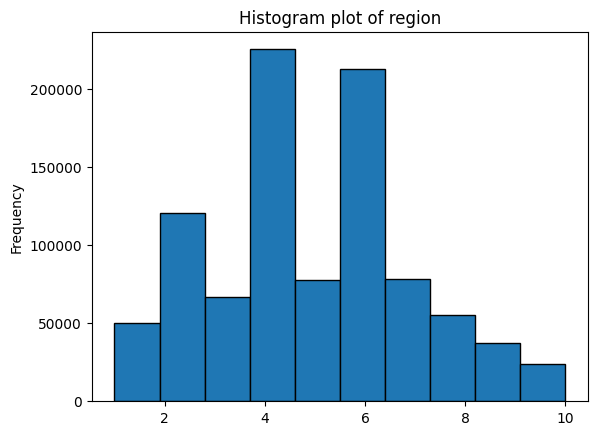

In [590]:
df.region.plot(kind='hist', title="Histogram plot of region", edgecolor='black')
plt.show()

**2. disasterNumber**

The disasterNumber is a unique identifier assigned by FEMA to each disaster declaration. All Public Assistance projects associated with the same disaster share this number. It does not carry intrinsic information about severity or cost by itself; rather, it acts as a grouping key that links multiple projects to a single disaster event. Analytically, it is useful for aggregation (e.g., total cost per disaster) and for understanding how many projects stem from a single declaration, but it should not be used directly as a predictive feature.

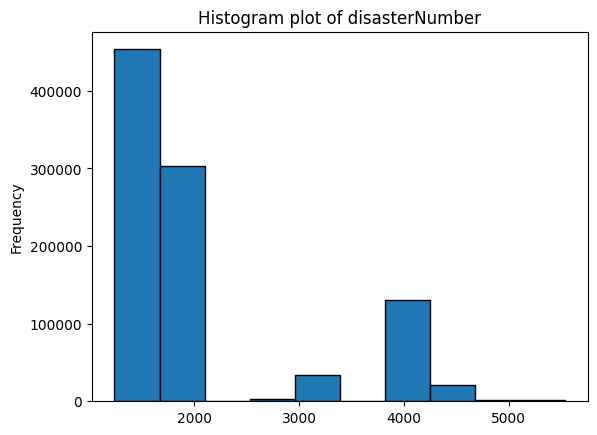

In [591]:
df.disasterNumber.plot(kind='hist', title="Histogram plot of disasterNumber", edgecolor='black')
plt.show()

**3. sriaDisaster**

The sriaDisaster field indicates whether a disaster is classified under FEMA’s Stafford Act Section 428 (also known as SRIA – Sandy Recovery Improvement Act) procedures. SRIA disasters follow an alternative Public Assistance framework that emphasizes fixed-cost estimates and streamlined project delivery. This designation can influence how costs are estimated, obligated, and managed, making it a potentially important indicator of funding structure and cost behavior, rather than disaster severity itself.

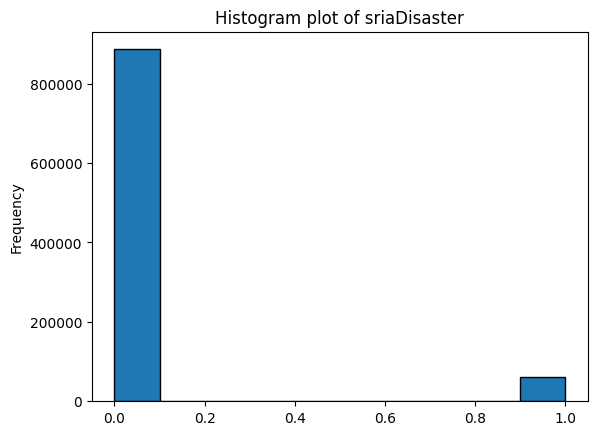

In [592]:
df.sriaDisaster.plot(kind='hist', title="Histogram plot of sriaDisaster", edgecolor='black')
plt.show()

**4. pnpStatus**

The pnpStatus variable indicates whether the applicant associated with a Public Assistance project is a Private Non-Profit (PNP) organization, such as certain hospitals, utilities, or educational institutions. PNP applicants are eligible for FEMA assistance under specific conditions and often differ from state or local governments in terms of asset types and recovery processes. This feature provides insight into the type of applicant requesting aid and can help explain variation in project costs and funding patterns.

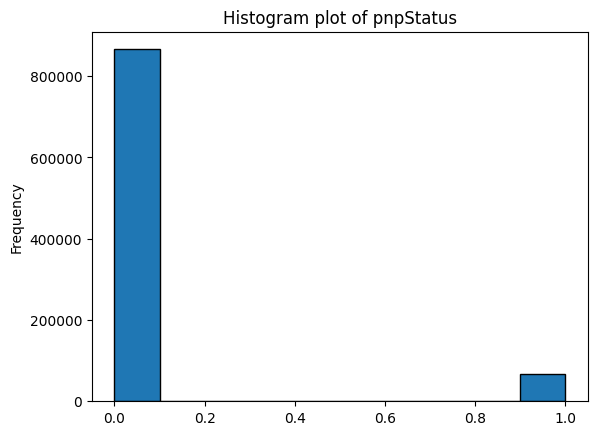

In [593]:
df.pnpStatus.plot(kind='hist', title="Histogram plot of pnpStatus", edgecolor='black')
plt.show()

**5. federalShareObligated**

The federalShareObligated feature represents the actual dollar amount of federal funding formally obligated by FEMA for a specific Public Assistance project. This is the primary financial outcome variable in the dataset and reflects FEMA’s committed share of recovery costs after eligibility review and approval. Because these amounts are highly right-skewed and dominated by rare, high-cost projects, this variable is well suited for quantile-based modeling and catastrophe risk estimation.

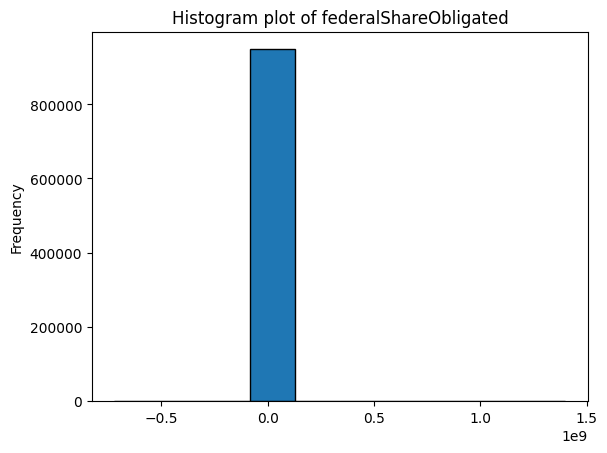

In [594]:
df.federalShareObligated.plot(kind='hist', title="Histogram plot of federalShareObligated", edgecolor='black')
plt.show()

**6. pwNumber**

The pwNumber is an identifier for the Project Worksheet (PW), which is the core documentation FEMA uses to define the scope, cost, and eligibility of a Public Assistance project. Each PW corresponds to a specific repair or recovery activity. While this field is critical for FEMA’s internal tracking and auditing, it functions purely as an identifier in the dataset and does not convey predictive information on its own.

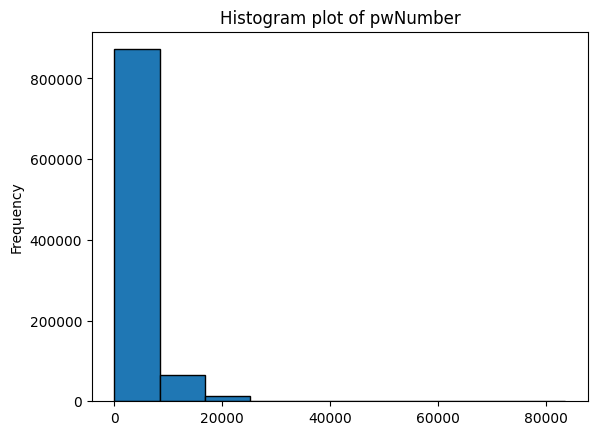

In [595]:
df.pwNumber.plot(kind='hist', title="Histogram plot of pwNumber", edgecolor='black')
plt.show()

**7. versionNumber**

The versionNumber indicates the revision count of a Project Worksheet. Projects may undergo multiple revisions as scopes change, costs are updated, or additional documentation is reviewed. Higher version numbers reflect administrative updates over time, not necessarily greater disaster severity. This feature is primarily useful for understanding data maturity and project evolution, rather than for predicting recovery costs.

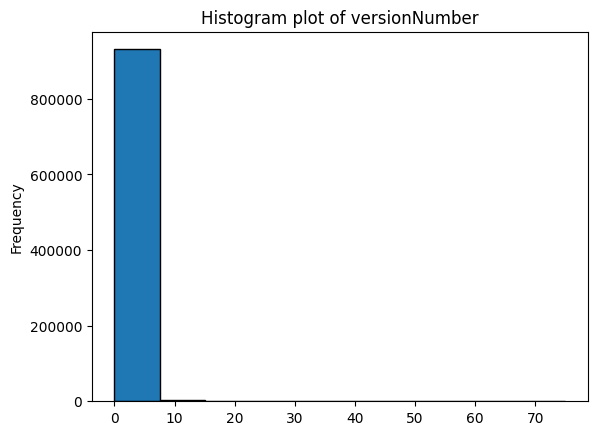

In [596]:
df.versionNumber.plot(kind='hist', title="Histogram plot of versionNumber", edgecolor='black')
plt.show()

### Treating Null Values

In [597]:
null_cols = ['county','pnpStatus','versionNumber','projectTitle','federalShareObligated']

In [598]:
df_clean.pnpStatus.value_counts(dropna=False)

pnpStatus
0.0    866136
1.0     67270
NaN     15280
Name: count, dtype: int64

In [599]:
df_clean.versionNumber.value_counts(dropna=False)

versionNumber
0.0     658532
1.0     169655
2.0      58062
3.0      24304
NaN      15280
4.0      10722
5.0       5138
6.0       2780
7.0       1622
8.0        968
9.0        555
10.0       323
11.0       202
12.0       121
13.0        89
14.0        69
15.0        51
16.0        36
17.0        30
18.0        26
19.0        22
20.0        17
21.0        14
22.0        11
23.0        10
24.0         6
25.0         3
59.0         2
58.0         2
57.0         2
63.0         2
66.0         2
62.0         2
61.0         2
38.0         1
26.0         1
55.0         1
37.0         1
60.0         1
39.0         1
42.0         1
30.0         1
67.0         1
43.0         1
68.0         1
69.0         1
44.0         1
45.0         1
46.0         1
70.0         1
71.0         1
64.0         1
72.0         1
73.0         1
74.0         1
47.0         1
65.0         1
75.0         1
Name: count, dtype: int64

In [600]:
# Imputing null values
df_clean = df_clean.assign(
    pnpStatus = df_clean.pnpStatus.fillna(-1),
    versionNumber = df_clean.versionNumber.fillna(-1)
)

In [601]:
df_clean.isna().sum()

region                      0
disasterNumber              0
sriaDisaster                0
declarationTitle            0
disasterType                0
incidentType                0
declarationDate             0
stateAbbreviation           0
state                       0
county                      0
applicantId                 0
applicantName               0
pnpStatus                   0
damageCategoryCode          0
federalShareObligated      87
dateObligated               0
pwNumber                    0
projectTitle             7495
versionNumber               0
eligibilityStatus           0
fundingStatus               0
paCloseoutStatus            0
id                          0
dtype: int64

### Dropping Irrelevant columns

In [602]:
df.columns

Index(['region', 'disasterNumber', 'sriaDisaster', 'declarationTitle',
       'disasterType', 'incidentType', 'declarationDate', 'stateAbbreviation',
       'state', 'county', 'applicantId', 'applicantName', 'pnpStatus',
       'damageCategoryCode', 'federalShareObligated', 'dateObligated',
       'pwNumber', 'projectTitle', 'versionNumber', 'eligibilityStatus',
       'fundingStatus', 'paCloseoutStatus', 'id'],
      dtype='object')

In [603]:
df_clean.head(5)

,region,disasterNumber,sriaDisaster,declarationTitle,disasterType,incidentType,declarationDate,stateAbbreviation,state,county,applicantId,applicantName,pnpStatus,damageCategoryCode,federalShareObligated,dateObligated,pwNumber,projectTitle,versionNumber,eligibilityStatus,fundingStatus,paCloseoutStatus,id
0,9,1397,0,EARTHQUAKE,DR,Earthquake,2001-12-05,GU,Other,Statewide,000-U6K9Y-00,GUAM WATERWORKS AUTHORITY,0.0,F - Utilities,121.50,2002-02-01,37,PUMP STATION REPAIR - HAIRLINE CRACKS,0.0,E,O,C,756305cd-2657-42ed-bb35-8c8013c551a8
1,4,1381,0,TROPICAL STORM ALLISON,DR,Severe Storm,2001-06-17,FL,Florida,Washington,133-99133-00,WASHINGTON COUNTY,0.0,C - Roads and Bridges,3116.84,2001-10-03,210,ROADS AND BRIDGES,0.0,E,O,C,553d4c29-85ef-4002-ad7f-0b10c0b3da19
2,6,1709,0,"SEVERE STORMS, TORNADOES, AND FLOODING",DR,Severe Storm,2007-06-29,TX,Texas,Other,213-99213-00,HENDERSON (COUNTY),0.0,C - Roads and Bridges,7211.69,2007-11-09,2594,ROADS AND BRIDGES,0.0,E,O,C,743771d1-7292-4009-afc7-a8258ebc4414
3,4,1549,0,HURRICANE IVAN,DR,"Hurricane, Tropical Storm",2004-09-15,AL,Other,Other,003-57144-00,ORANGE BEACH,0.0,A - Debris Removal,129387.21,2005-01-29,1509,DEBRIS REMOVAL,0.0,E,O,C,4c86e4b3-3e25-4b89-904a-26048d4181c1
4,5,1370,0,"SEVERE WINTER STORMS, FLOODING, AND TORNADOES",DR,Flood,2001-05-16,MN,Other,Other,055-33866-00,LA CRESCENT,0.0,A - Debris Removal,11512.50,2001-09-22,1418,DEBRIS REMOVAL,0.0,E,O,C,158efd8c-5c67-418b-8951-6e3ca9be537e


In [604]:
df_clean = df_clean.drop(
    ['id', 'projectTitle', 'applicantName', 'applicantId', 'stateAbbreviation', 'declarationTitle', 'pwNumber', 'disasterNumber'],
    axis=1
).dropna()

In [605]:
df_clean.isna().sum()

region                   0
sriaDisaster             0
disasterType             0
incidentType             0
declarationDate          0
state                    0
county                   0
pnpStatus                0
damageCategoryCode       0
federalShareObligated    0
dateObligated            0
versionNumber            0
eligibilityStatus        0
fundingStatus            0
paCloseoutStatus         0
dtype: int64

In [606]:
df_clean.head(5)

,region,sriaDisaster,disasterType,incidentType,declarationDate,state,county,pnpStatus,damageCategoryCode,federalShareObligated,dateObligated,versionNumber,eligibilityStatus,fundingStatus,paCloseoutStatus
0,9,0,DR,Earthquake,2001-12-05,Other,Statewide,0.0,F - Utilities,121.50,2002-02-01,0.0,E,O,C
1,4,0,DR,Severe Storm,2001-06-17,Florida,Washington,0.0,C - Roads and Bridges,3116.84,2001-10-03,0.0,E,O,C
2,6,0,DR,Severe Storm,2007-06-29,Texas,Other,0.0,C - Roads and Bridges,7211.69,2007-11-09,0.0,E,O,C
3,4,0,DR,"Hurricane, Tropical Storm",2004-09-15,Other,Other,0.0,A - Debris Removal,129387.21,2005-01-29,0.0,E,O,C
4,5,0,DR,Flood,2001-05-16,Other,Other,0.0,A - Debris Removal,11512.50,2001-09-22,0.0,E,O,C


### Saving the clean data

In [608]:
df_clean.to_csv(r'C:\Playground\Catastrophe Risk Estimation Using Quantile Modeling\data\cleaned\fema_cleaned.csv')